In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
pickleFileCut = './DMsimp_spin-1_Monojet_DF.pcl'
dfAll = pd.read_pickle(pickleFileCut)

In [3]:
df = dfAll[(dfAll['Coupling'] == 'Axial') 
                 & (dfAll['Mode'] == 'DM+QCDjets') 
                 & (dfAll['Data-takingperiod'] == 2017)]

In [4]:
print(len(df))

43


In [5]:
binCols = [c for c in df.columns if 'bin_' in c]
# Add total yield column
df['TotalYield(pre)'] = df[binCols].sum(axis=1)

In [6]:
df['Efficiency(pre)'] = df['$\Delta \phi (\mathrm{PF}_\mathrm{Charged})<2.0$ rad'] # efficiency for the pre-selection

In [7]:
# Compute total signal yield = sum(bins)/(pre-cut eff)
df['TotalYield'] = df['TotalYield(pre)']/df["Efficiency(pre)"]  

In [8]:
# Compute total cross-section
# (the efficiency is computed after a basic requirement of pT(DM system) > 150 GeV)
lum2017 = 41.5 #fb^-1
df['TotalXSec-pT150 (fb)'] = df['TotalYield']/lum2017

In [9]:
df[df.columns[:4].to_list()+['Efficiency(pre)','TotalYield(pre)','TotalYield','TotalXSec-pT150 (fb)']]

,Coupling,Mode,$m_{med}$,$m_{DM}$,Efficiency(pre),TotalYield(pre),TotalYield,TotalXSec-pT150 (fb)
264,Axial,DM+QCDjets,100.0,1.0,0.13955,967227.491000,6.931046e+06,167013.160373
266,Axial,DM+QCDjets,100.0,30.0,0.13988,683023.284000,4.882923e+06,117660.797723
267,Axial,DM+QCDjets,100.0,40.0,0.14075,374885.725000,2.663487e+06,64180.397612
268,Axial,DM+QCDjets,100.0,45.0,0.14382,192796.164000,1.340538e+06,32302.118612
269,Axial,DM+QCDjets,100.0,55.0,0.18570,25153.813100,1.354540e+05,3263.952495
270,Axial,DM+QCDjets,100.0,60.0,0.19495,18848.399300,9.668325e+04,2329.716832
271,Axial,DM+QCDjets,100.0,70.0,0.21279,12633.341600,5.937000e+04,1430.602330
262,Axial,DM+QCDjets,100.0,100.0,0.24908,5515.200200,2.214228e+04,533.549022
263,Axial,DM+QCDjets,100.0,150.0,0.29305,2057.086200,7.019574e+03,169.146365
265,Axial,DM+QCDjets,100.0,200.0,0.32490,933.210210,2.872300e+03,69.212044


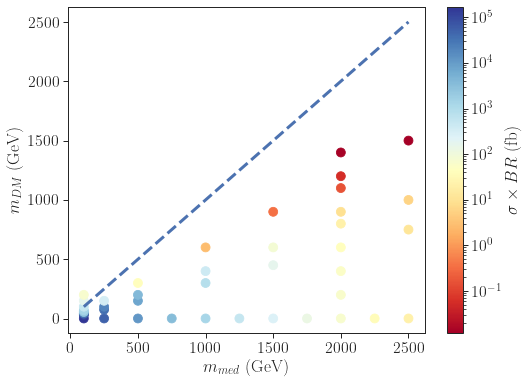

In [10]:
plt.figure(figsize=(8,6))
p =plt.scatter(df['$m_{med}$'], df['$m_{DM}$'], c=df['TotalXSec-pT150 (fb)'],
               s=80,cmap=cm,
               norm=LogNorm(vmin=df['TotalXSec-pT150 (fb)'].min(),vmax=df['TotalXSec-pT150 (fb)'].max()))
x = np.linspace(df['$m_{med}$'].min(),df['$m_{med}$'].max(),100)
plt.plot(x,x,linestyle='--',linewidth=3)
plt.colorbar(label=r'$\sigma \times BR$ (fb)')
plt.xlabel(r'$m_{med}$ (GeV)')
plt.ylabel(r'$m_{DM}$ (GeV)')
plt.show()

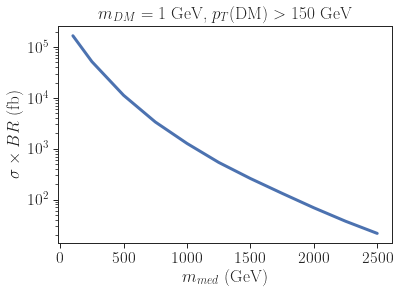

In [11]:
# Plot cross-sections for mDM = 1.0 only
df0 = df[df['$m_{DM}$'] == 1.0]
plt.plot(df0['$m_{med}$'], df0['TotalXSec-pT150 (fb)'],linewidth=3)
plt.xlabel(r'$m_{med}$ (GeV)')
plt.ylabel(r'$\sigma \times BR$ (fb)')
plt.yscale('log')
plt.title(r'$m_{DM} = 1$ GeV, $p_T$(DM) $> 150$ GeV')
plt.show()

In [12]:
dfModel = df[(df['Coupling'] == 'Axial') 
                   & (df['Mode'] == 'DM+QCDjets') 
                   & (df['Data-takingperiod'] == 2017)
                   & (df["$m_{med}$"] == 2000.) 
                   & (df["$m_{DM}$"] == 1.0)
                 ]
dfModel

,Coupling,Mode,$m_{med}$,$m_{DM}$,$g_{DM}$,$g_{q}$,Data-takingperiod,Fullsample,Triggeremulation,$p_{T}^{miss}>250$GeV,...,bin_1160.0_1250.0,bin_1160.0_1250.0_ErrorPlus,bin_1160.0_1250.0_ErrorMinus,bin_1250.0_1400.0,bin_1250.0_1400.0_ErrorPlus,bin_1250.0_1400.0_ErrorMinus,TotalYield(pre),Efficiency(pre),TotalYield,TotalXSec-pT150 (fb)
281,Axial,DM+QCDjets,2000.0,1.0,1.0,0.25,2017,1.0,0.89878,0.45603,...,3.0281,0.3937,-0.3937,5.9266,0.53802,-0.53802,1078.5303,0.37794,2853.707731,68.764042
